# 이변량_범주(숫자) vs 범주

# 1.환경준비

* 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [3]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


# 2.범주 --> 범주

## (1) 교차표(pd.crosstab)

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [5]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [6]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [7]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [9]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'all')

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [10]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize = 'all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


## (2) 시각화
* mosaic
* (참조) 100% Stacked Bar


1) Pclass --> Survived

* mosaic plot
    * mosaic(dataframe, [ feature, target])

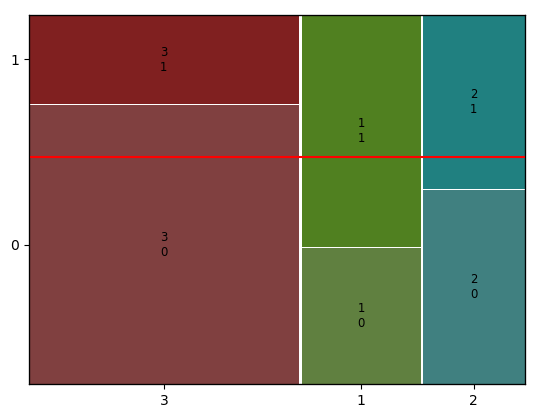

In [12]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r') #전체 평균은 Y에 대한 평균
plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


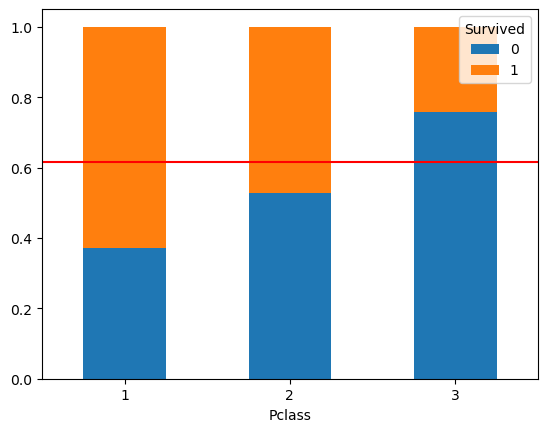

In [16]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.xticks(rotation=0) # x축 값을 올바르게
plt.show()
# 집착 ㄴㄴ 문법은 그대로 해야한다. 무조건

비율만 비교하므로 양에 대한 비교는 할 수 없다!

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

아래 관계에 대해서 교차표와 시각화(mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


* [문1] Sex --> Survived

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


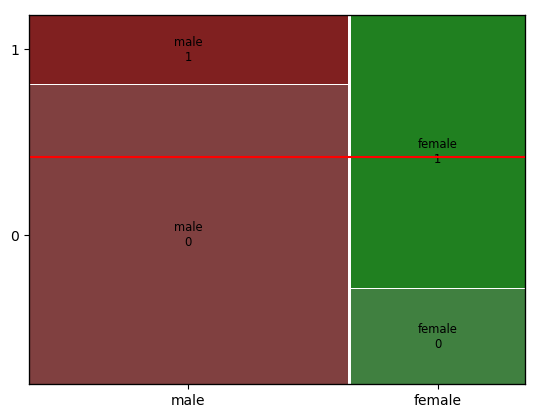

In [17]:
temp = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize = 'index')
print(temp)
mosaic(titanic, [ 'Sex','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r') #전체 평균은 Y에 대한 평균
plt.show()

* [문2] Embarked --> Survived

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


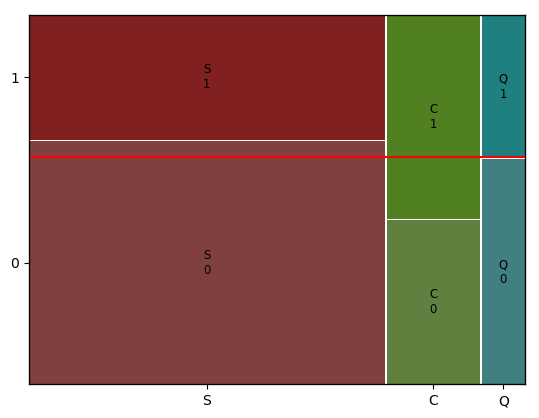

In [19]:
temp = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize = 'index')
print(temp)
mosaic(titanic,['Embarked','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

* [문3] Title --> Survived

Survived         0         1
Title                       
Master    0.439024  0.560976
Miss      0.297297  0.702703
Mr        0.839388  0.160612
Mrs       0.203125  0.796875
Others    0.785714  0.214286


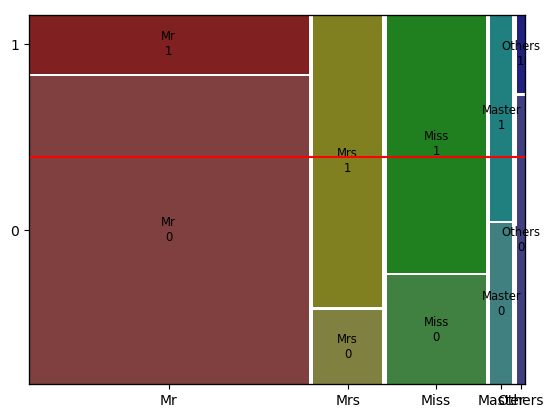

In [21]:
temp = pd.crosstab(titanic['Title'], titanic['Survived'], normalize = 'index')
print(temp)
mosaic(titanic,['Title','Survived'], gap = 0.01)
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

## (3) 수치화 : 카이제곱검정

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다. 

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [22]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [23]:
# 1) 먼저 교차표 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------------------------------------


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 수치화 해 봅시다.

* [문1] Sex --> Survived

In [27]:
table = pd.crosstab(titanic['Survived'],titanic['Sex'])
print(table)
print('-'*50)

spst.chi2_contingency(table)

Sex       female  male
Survived              
0             81   468
1            233   109
--------------------------------------------------


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

* [문2] Embarked --> Survived

In [28]:
var = "Embarked"

table = pd.crosstab(titanic['Survived'],titanic[var])
print(table)
print('-'*50)

spst.chi2_contingency(table)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219
--------------------------------------------------


(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  47.44444444, 398.04040404],
        [ 64.48484848,  29.55555556, 247.95959596]]))

* [문3] Title --> Survived

In [29]:
var = "Title"

table = pd.crosstab(titanic['Survived'],titanic[var])
print(table)
print('-'*50)

spst.chi2_contingency(table)

Title     Master  Miss   Mr  Mrs  Others
Survived                                
0             18    55  439   26      11
1             23   130   84  102       3
--------------------------------------------------


(289.1953165452417,
 2.318405007221846e-61,
 4,
 array([[ 25.26262626, 113.98989899, 322.25252525,  78.86868687,
           8.62626263],
        [ 15.73737374,  71.01010101, 200.74747475,  49.13131313,
           5.37373737]]))

# 3.숫자 --> 범주

## (1) 시각화

* 히스토그램을 Survived로 나눠서 그려봅시다.

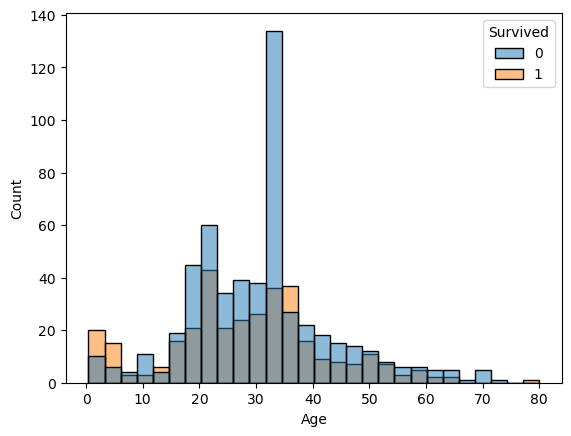

In [30]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

* kdeplot을 그려봅시다.  
* 두가지 방법이 있습니다.
    * ① kdeplot(   , hue = 'Survived') 
        * 생존여부의 비율이 유지된 채로 그려짐
        * 두 그래프의 아래 면적의 합이 1
    * ② kdeplot(   , hue = 'Survived', common_norm = False)
        * 생존여부 각각 아래 면적의 합이 1인 그래프
    * ③ kdeplot(   , hue = 'Survived', multiple = 'fill')
        * 나이에 따라 생존여부 **비율**을 비교해볼 수 있음. (양의 비교가 아닌 비율!)


① kdeplot( , hue = 'Survived)

* common_norm = True (기본값)

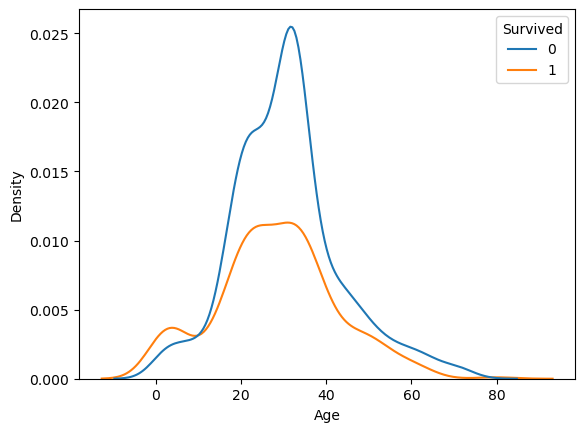

In [31]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived')
plt.show()

② kdeplot( , hue = 'Survived, common_norm = False)

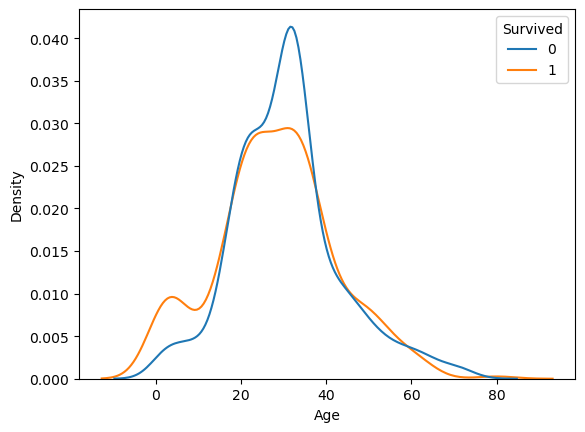

In [32]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived', 
            common_norm = False)
plt.show()

③ multiple = 'fill' 옵션

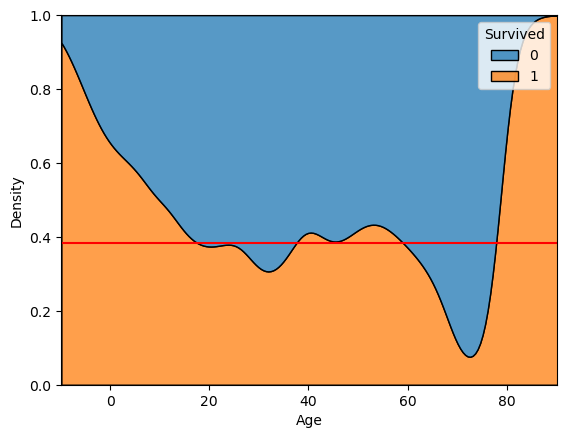

In [33]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

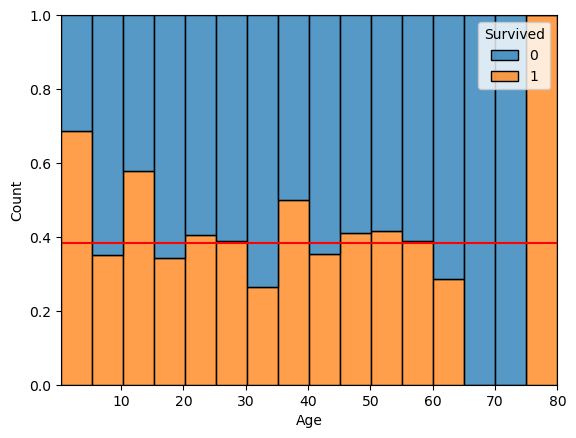

In [34]:
sns.histplot(x='Age', data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

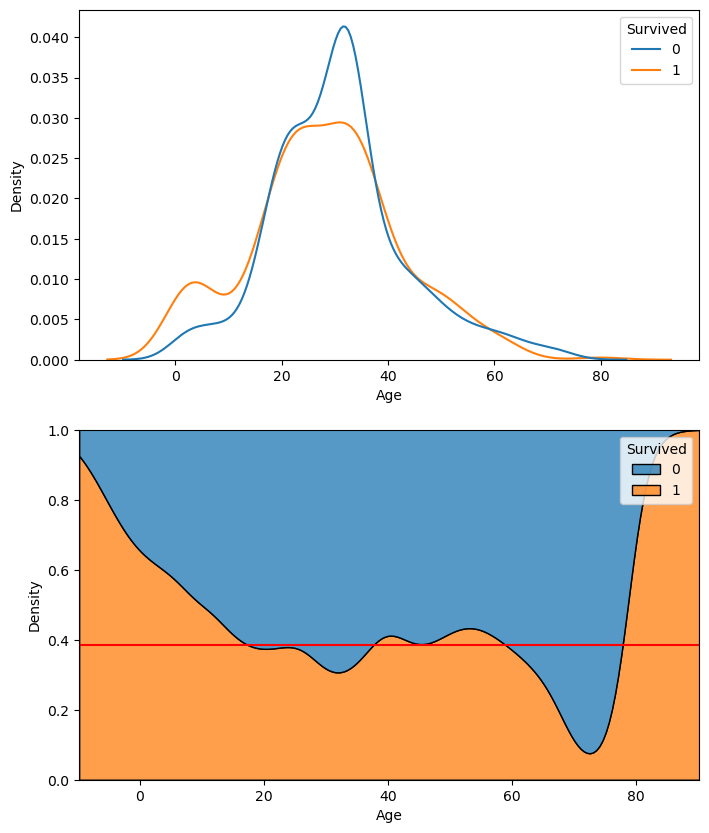

In [36]:
plt.figure(figsize = (8,10)) 
plt.subplot(2,1,1) 
sns.kdeplot(x='Age', data = titanic, hue ='Survived', common_norm = False) 

plt.subplot(2,1,2) 
sns.kdeplot(x='Age', data = titanic, hue ='Survived', multiple = 'fill') 
plt.axhline(titanic['Survived'].mean(), color = 'r') 

plt.show()

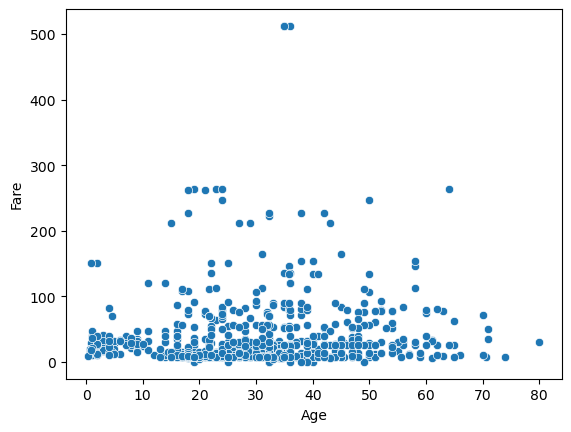

In [38]:
sns.scatterplot(x = 'Age', y ='Fare', data=titanic)
plt.show()

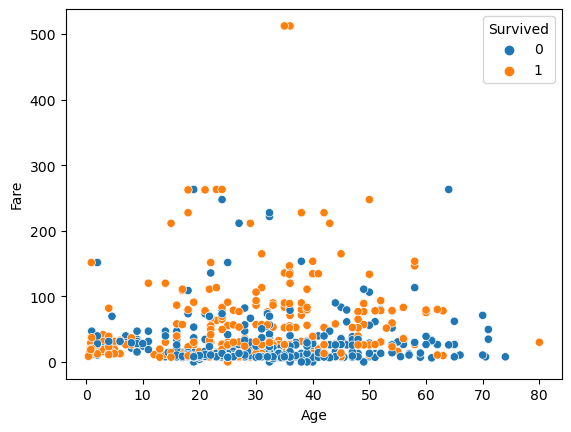

In [37]:
sns.scatterplot(x = 'Age', y ='Fare', data=titanic,hue ='Survived')
plt.show()

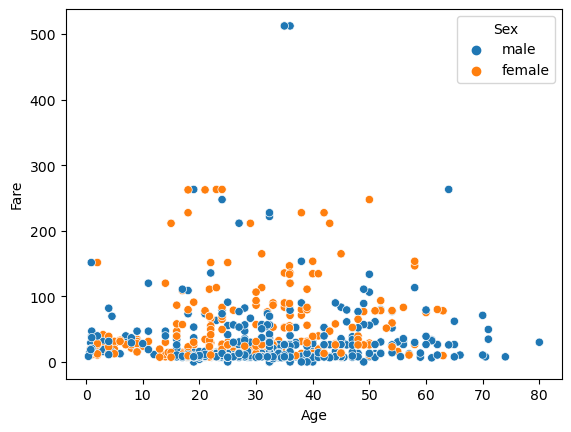

In [39]:
sns.scatterplot(x = 'Age', y ='Fare', data=titanic,hue ='Sex')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 시각화 해 봅시다.

* [문1] Fare(운임) --> Survived

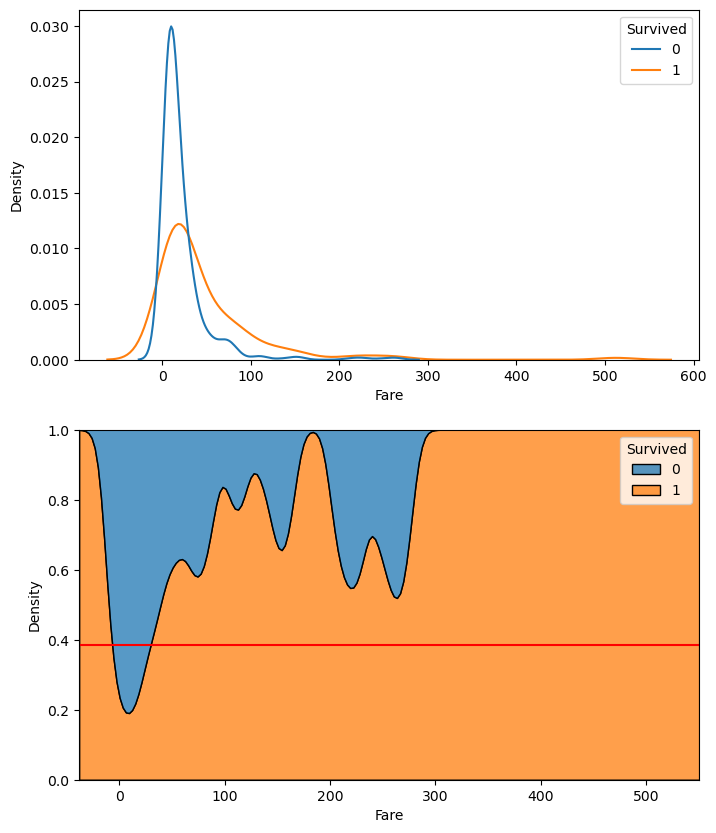

In [43]:
plt.figure(figsize = (8,10)) 
plt.subplot(2,1,1) 
sns.kdeplot(x='Fare', data = titanic, hue ='Survived', common_norm = False) 

plt.subplot(2,1,2) 
sns.kdeplot(x='Fare', data = titanic, hue ='Survived', multiple = 'fill') 
plt.axhline(titanic['Survived'].mean(), color = 'r') 

plt.show()

In [45]:
# 6시간 45분 이미지 캡쳐 보기